# Predictions for August 9, 2015

Assuming that everything goes well, I'm planning on attending the Nats game tomorrow afternoon. Due to the awesomeness that is http://blog.letteddywin.com, I came across historical race data for the Presidents' Race. So, let's see what tomorrow may bring.  

In [1]:
# First, let's load the data
presidents = read.csv("presidents.csv")

In [2]:
# Then, let's get the data munged nicely. So that I can sort by weekday.

library(lubridate)
presidents$day = weekdays(as.Date(presidents$DATE))
presidents$month = months(as.Date(presidents$DATE))
presidents$year = year(as.Date(presidents$DATE))

recent = subset(presidents, as.Date(presidents$DATE) > "2013-01-01")

Loading required package: ggplot2


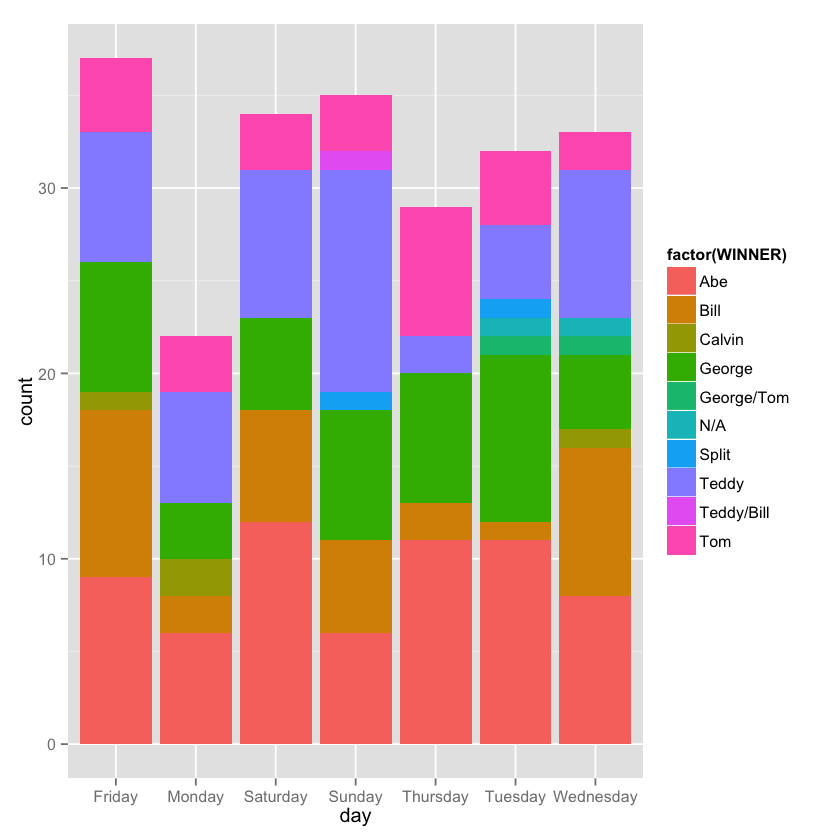

In [3]:
# Now, let's plot some data and see how the presidents do on any given Sunday.

require(ggplot2)
qplot(day, data=recent, geom="bar", fill=factor(WINNER))

In recent years (since 2013), Sunday seems to be a big Teddy day. Let's see what a logistic regression suggests about Teddy's chances tomorrow (Sunday, August 9th, against the Colorado Rockies). 

In [4]:
presidents$abe = presidents$WINNER == "Abe"
presidents$bill = presidents$WINNER == "Bill"
presidents$calvin = presidents$WINNER == "Calvin"
presidents$george = presidents$WINNER == "George"
presidents$teddy = presidents$WINNER == "Teddy"
presidents$tom = presidents$WINNER == "Tom"

teddyModel = glm(teddy ~ month + day + year + OPPONENT, data=presidents, family=binomial)

summary(teddyModel)


Call:
glm(formula = teddy ~ month + day + year + OPPONENT, family = binomial, 
    data = presidents)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.16090  -0.26732  -0.05952  -0.00966   2.51928  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.689e+03  4.555e+02  -5.904 3.55e-09 ***
monthAugust     2.041e+00  7.967e-01   2.561  0.01043 *  
monthJuly      -5.021e-01  8.254e-01  -0.608  0.54299    
monthJune      -5.950e-02  9.193e-01  -0.065  0.94840    
monthMarch     -1.083e+01  7.373e+03  -0.001  0.99883    
monthMay        5.954e-01  7.495e-01   0.794  0.42698    
monthOctober    6.327e+00  1.255e+00   5.042 4.61e-07 ***
monthSeptember  1.233e+00  7.812e-01   1.578  0.11448    
dayMonday       2.725e-02  7.644e-01   0.036  0.97156    
daySaturday     2.614e-01  6.644e-01   0.393  0.69401    
daySunday       1.197e+00  6.161e-01   1.942  0.05209 .  
dayThursday    -1.073e+00  9.014e-01  -1.191  0.23368    
dayT

*Whoa*. In other words, there are statistically significant, positive correlations between Teddy winning and it being a Sunday, against Colorado, and in August.

I'd put a small wager on Teddy winning tomorrow.

Also, it should be a beautiful day, and Scherzer is on the mound. Go Nats!